<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is02_discriminator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear discrimination = Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load the IRIS dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [ ]:
# Use only "Virginica" and "Versicolor" classes
df_binary = df[df['species'].isin([1, 2])]  # 1: Versicolor, 2: Virginica
X = df_binary[['petal length (cm)', 'petal width (cm)']].values
y = df_binary['species'].values

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

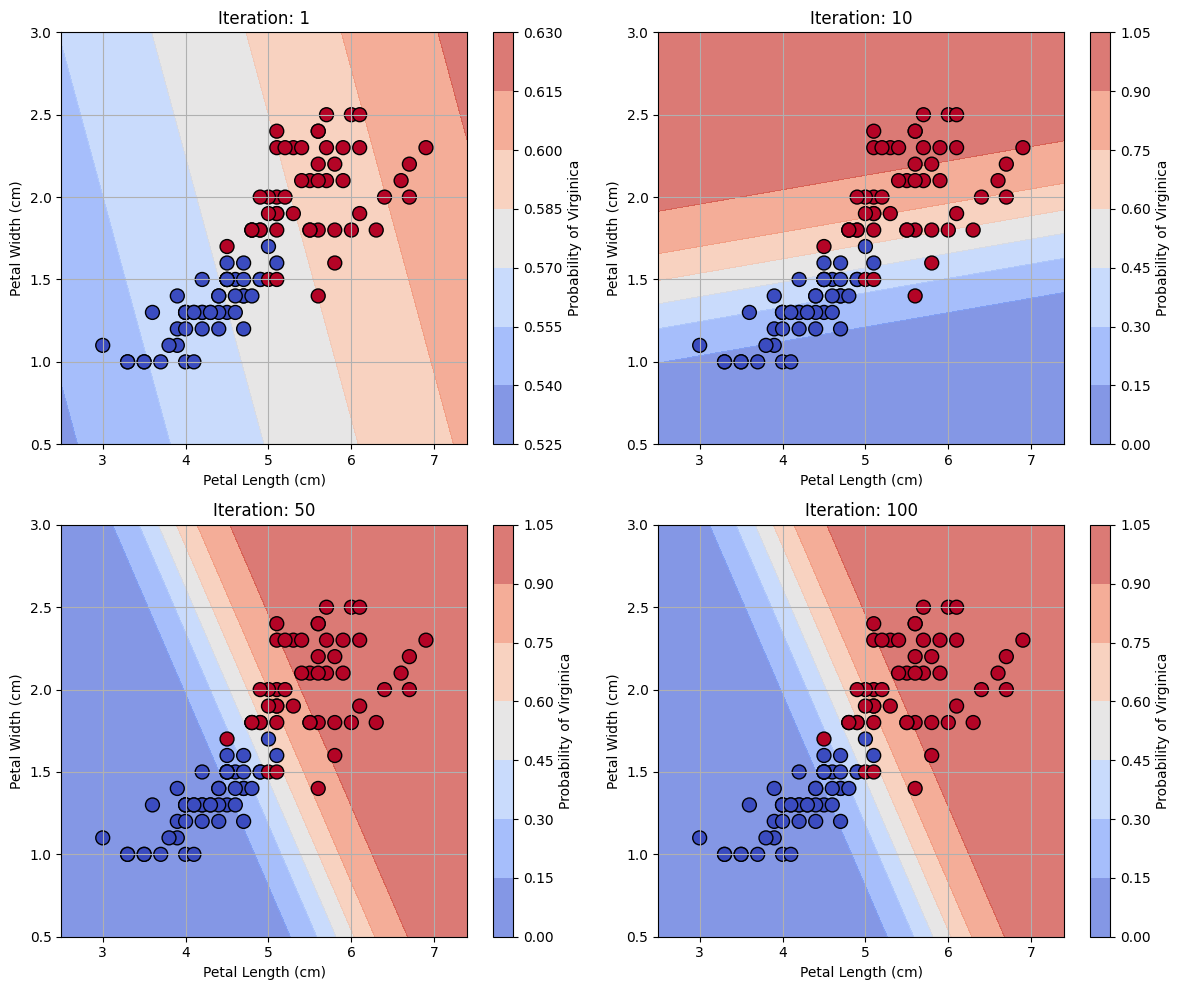

In [ ]:
# Create meshgrid for decision boundary plotting
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Logistic regression model with iterations to display
iterations_to_display = [1, 10, 50, 100]  # Iterations to visualize

plt.figure(figsize=(12, 10))

for i, iteration in enumerate(iterations_to_display):
    # Logistic regression model
    model = LogisticRegression(max_iter=iteration, solver='lbfgs')
    model.fit(X, y)

    # Predict probabilities for the meshgrid
    Z_prob = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Probability for class 1 (Virginica)
    Z_prob = Z_prob.reshape(xx.shape)

    # Create plot with gradient
    plt.subplot(2, 2, i+1)
    plt.contourf(xx, yy, Z_prob, alpha=0.7, cmap='coolwarm')  # Probability gradient
    plt.colorbar(label='Probability of Virginica')

    # Scatter plot of the actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100, label='Data Points')

    plt.title(f'Iteration: {iteration}')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.grid(True)

plt.tight_layout()
plt.show()